Intro

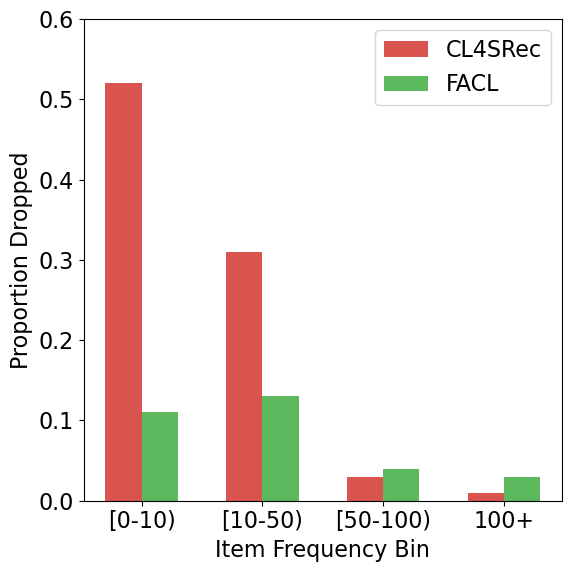

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16   # 设置默认字体大小（全局）

bins = ['[0-10)', '[10-50)', '[50-100)', '100+']

# Drop ratio（高频低，低频高），模拟CL4SRec显著高于FACL
drop_cl4srec = [0.52, 0.31, 0.03, 0.01]  # Baseline
drop_facl =    [0.11, 0.13, 0.04, 0.03]  # Ours

bar_width = 0.3
x = np.arange(len(bins))

plt.figure(figsize=(6,6))
plt.bar(x-bar_width/2, drop_cl4srec, width=bar_width, label='CL4SRec', color='#d9534f')
plt.bar(x+bar_width/2, drop_facl, width=bar_width, label='FACL', color='#5cb85c')

plt.xticks(x, bins)
plt.ylabel("Proportion Dropped")
plt.xlabel("Item Frequency Bin")
plt.ylim(0, 0.6)
plt.legend()
# plt.title("Proportion of items dropped under drop-item perturbation")
plt.tight_layout()
plt.savefig('drop_ratio.pdf')  # 论文插图保存
plt.show()


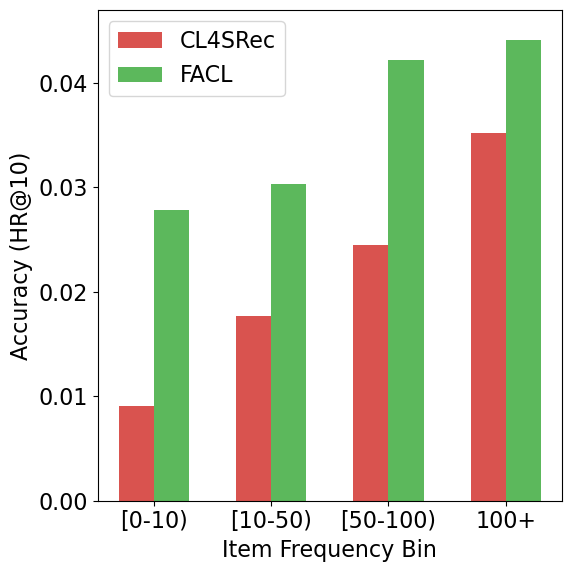

In [88]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16   # 设置默认字体大小（全局）

bins = ['[0-10)', '[10-50)', '[50-100)', '100+']

# 准确率（注意低频准确率两法差别大，高频趋近）
acc_cl4srec = [0.0091, 0.0177, 0.0245, 0.0352]
acc_facl =    [0.0278, 0.0303, 0.0422, 0.0441]

bar_width = 0.3
x = np.arange(len(bins))

plt.figure(figsize=(6,6))
plt.bar(x-bar_width/2, acc_cl4srec, width=bar_width, label='CL4SRec', color='#d9534f')
plt.bar(x+bar_width/2, acc_facl, width=bar_width, label='FACL', color='#5cb85c')

plt.xticks(x, bins)
plt.ylabel("Accuracy (HR@10)")
plt.xlabel("Item Frequency Bin")
plt.ylim(0, 0.047)
plt.legend()
# plt.title("Prediction accuracy for different item frequency bins")
plt.tight_layout()
plt.savefig('accuracy.pdf')  # 论文插图保存
plt.show()


ablation study

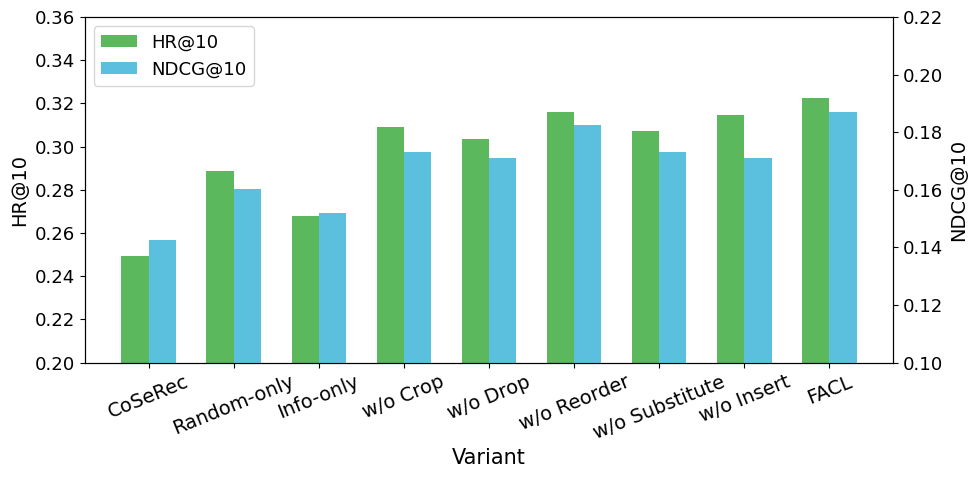

In [79]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14

variants = [
    "CoSeRec", "Random-only", "Info-only",
    "w/o Crop", "w/o Drop", "w/o Reorder", "w/o Substitute", "w/o Insert",
    "FACL"
]
x = np.arange(len(variants))
bar_width = 0.32

# 示例数据，按顺序填入你的表中HR@10/NDCG@10
ml20m_hr10 =    [0.2495, 0.2885, 0.2679, 0.3090, 0.3035, 0.3160, 0.3072, 0.3147, 0.3226]
ml20m_ndcg10 =  [0.1426, 0.1602, 0.1519, 0.1730, 0.1709, 0.1824, 0.1731, 0.1712, 0.1869]

fig, ax1 = plt.subplots(figsize=(10,5))

# HR@10
bars1 = ax1.bar(x-bar_width/2, ml20m_hr10, width=bar_width, color="#5cb85c", label="HR@10")
ax1.set_ylabel('HR@10', fontsize=14)
ax1.set_ylim(0.2, 0.36)
ax1.set_xticks(x)
ax1.set_xticklabels(variants, rotation=22, fontsize=14)
ax1.tick_params(axis='y', labelsize=13)
ax1.set_xlabel("Variant", fontsize=15)

# NDCG@10 （右Y轴）
ax2 = ax1.twinx()
bars2 = ax2.bar(x+bar_width/2, ml20m_ndcg10, width=bar_width, color="#5bc0de", label="NDCG@10")
ax2.set_ylabel('NDCG@10', fontsize=14)
ax2.set_ylim(0.1, 0.22)
ax2.tick_params(axis='y', labelsize=13)

# 图例
leg1 = ax1.legend([bars1, bars2], ['HR@10', 'NDCG@10'], fontsize=13, loc='upper left')
# plt.title("Ablation on Augmentation Sets (ML-20M)", fontsize=16)
plt.tight_layout()
plt.savefig('ablation_aug_ml20m.pdf')
plt.show()


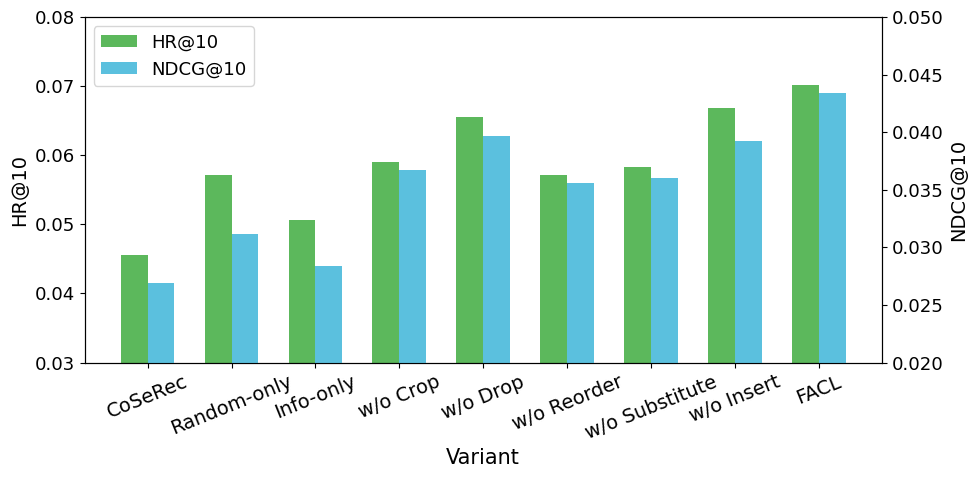

In [80]:
variants = [
    "CoSeRec", "Random-only", "Info-only",
    "w/o Crop", "w/o Drop", "w/o Reorder", "w/o Substitute", "w/o Insert",
    "FACL"
]
x = np.arange(len(variants))
bar_width = 0.32
plt.rcParams['font.size'] = 14


# 示例数据，按顺序填入你的表中HR@10/NDCG@10
yelp_hr10 =     [0.0455, 0.0572, 0.0507, 0.0590, 0.0655, 0.0571, 0.0583, 0.0669, 0.0701]
yelp_ndcg10 =   [0.0269, 0.0312, 0.0284, 0.0367, 0.0397, 0.0356, 0.0360, 0.0392, 0.0434]

fig, ax1 = plt.subplots(figsize=(10,5))

# HR@10
bars1 = ax1.bar(x-bar_width/2, yelp_hr10, width=bar_width, color="#5cb85c", label="HR@10")
ax1.set_ylabel('HR@10', fontsize=14)
ax1.set_ylim(0.03, 0.08)
ax1.set_xticks(x)
ax1.set_xticklabels(variants, rotation=22, fontsize=14)
ax1.tick_params(axis='y', labelsize=13)
ax1.set_xlabel("Variant", fontsize=15)

# NDCG@10 （右Y轴）
ax2 = ax1.twinx()
bars2 = ax2.bar(x+bar_width/2, yelp_ndcg10, width=bar_width, color="#5bc0de", label="NDCG@10")
ax2.set_ylabel('NDCG@10', fontsize=14)
ax2.set_ylim(0.02, 0.05)
ax2.tick_params(axis='y', labelsize=13)

# 图例
leg1 = ax1.legend([bars1, bars2], ['HR@10', 'NDCG@10'], fontsize=13, loc='upper left')
# plt.title("Ablation on Augmentation Sets (Yelp)", fontsize=16)
plt.tight_layout()
plt.savefig('ablation_aug_yelp.pdf')
plt.show()


parameter sensitivity

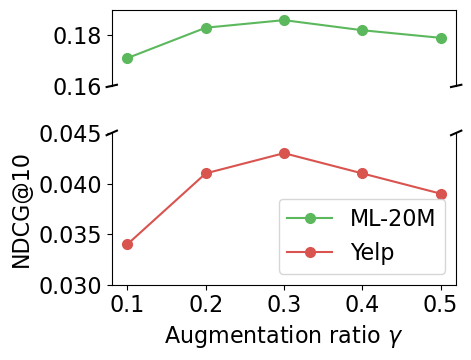

In [110]:
import matplotlib.pyplot as plt

# 参数取值
gammas = [0.1,0.2, 0.3,0.4, 0.5]
ml20m = [0.171, 0.183, 0.186, 0.182,0.179]
yelp  = [0.034, 0.041, 0.043, 0.041, 0.039]
plt.rcParams['font.size'] = 16

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 4),
                               gridspec_kw={'height_ratios': [1, 2]})

# 上段显示高区间
ax1.plot(gammas, ml20m, 'o-', label="ML-20M", color="#5cb85c", markersize=7)
ax1.plot(gammas, yelp,  'o-', label="Yelp", color="#d9534f", markersize=7)
ax1.set_ylim(0.16, 0.19)
ax1.tick_params(axis='x', bottom=False)


# 下段显示低区间
ax2.plot(gammas, ml20m, 'o-', label="ML-20M", color="#5cb85c", markersize=7)
ax2.plot(gammas, yelp,  'o-', label="Yelp", color="#d9534f", markersize=7)
ax2.set_ylim(0.03, 0.045)

# 断轴样式
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)  # 不显示上坐标
ax2.xaxis.tick_bottom()
d = .015   # 断裂线长度
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)           # 左上
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)     # 右上
kwargs.update(transform=ax2.transAxes)            # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)      # 左下
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)# 右下

# x轴和y轴标签
plt.xticks(gammas, [str(g) for g in gammas], fontsize=16)
ax2.set_xlabel(r"Augmentation ratio $\gamma$", fontsize=16)
ax2.set_ylabel("NDCG@10", fontsize=16)

# 图例和美化
ax2.legend(fontsize=16, loc='best')
# plt.suptitle(r"Sensitivity to $\gamma$", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("sens_gamma.pdf")
plt.show()


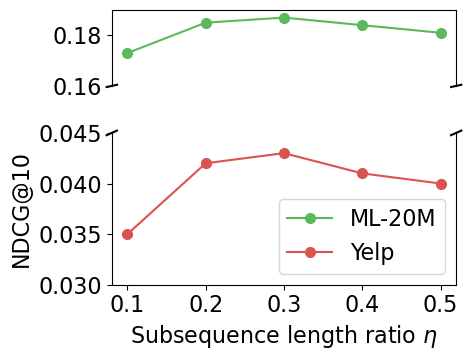

In [111]:
etas = [0.1,0.2, 0.3,0.4, 0.5]
ml20m = [0.173, 0.185, 0.187, 0.184, 0.181]
yelp  = [0.035, 0.042, 0.043, 0.041, 0.040]
plt.rcParams['font.size'] = 16

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 4),
                               gridspec_kw={'height_ratios': [1, 2]})
ax1.plot(etas, ml20m, 'o-', label="ML-20M", color="#5cb85c", markersize=7)
ax1.plot(etas, yelp,  'o-', label="Yelp", color="#d9534f", markersize=7)
ax1.set_ylim(0.16, 0.19)
ax1.tick_params(axis='x', bottom=False)

ax2.plot(etas, ml20m, 'o-', label="ML-20M", color="#5cb85c", markersize=7)
ax2.plot(etas, yelp,  'o-', label="Yelp", color="#d9534f", markersize=7)
ax2.set_ylim(0.03, 0.045)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
plt.xticks(etas, [str(e) for e in etas], fontsize=16)
ax2.set_xlabel(r"Subsequence length ratio $\eta$", fontsize=16)
ax2.set_ylabel("NDCG@10", fontsize=16)
ax2.legend(fontsize=16)
# plt.suptitle(r"Sensitivity to $\eta$", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("sens_eta.pdf")
plt.show()


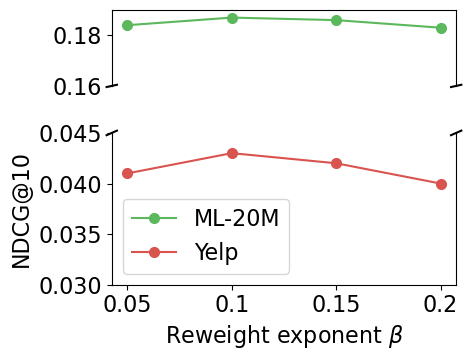

In [112]:
betas = [0.05, 0.1, 0.15, 0.2]
ml20m = [0.184, 0.187, 0.186, 0.183]
yelp  = [0.041, 0.043, 0.042, 0.040]
plt.rcParams['font.size'] = 16

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 4),
                               gridspec_kw={'height_ratios': [1, 2]})
ax1.plot(betas, ml20m, 'o-', label="ML-20M", color="#5cb85c", markersize=7)
ax1.plot(betas, yelp,  'o-', label="Yelp", color="#d9534f", markersize=7)
ax1.set_ylim(0.16, 0.19)
ax1.tick_params(axis='x', bottom=False)

ax2.plot(betas, ml20m, 'o-', label="ML-20M", color="#5cb85c", markersize=7)
ax2.plot(betas, yelp,  'o-', label="Yelp", color="#d9534f", markersize=7)
ax2.set_ylim(0.03, 0.045)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
plt.xticks(betas, [str(b) for b in betas], fontsize=16)
ax2.set_xlabel(r"Reweight exponent $\beta$", fontsize=16)
ax2.set_ylabel("NDCG@10", fontsize=16)
ax2.legend(fontsize=16)
# plt.suptitle(r"Sensitivity to $\beta$", fontsize=15)
plt.tight_layout(rect=[0,0,1,0.97])
plt.savefig("sens_beta.pdf")
plt.show()


case study

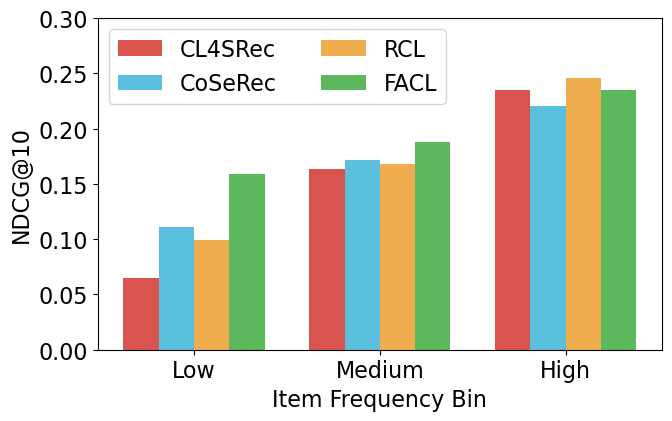

In [103]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

# 分频区间
groups = ['Low', 'Medium', 'High']
# 四种方法的HR@10
cl4srec = [0.065, 0.163, 0.235]
coserec = [0.111, 0.172, 0.220]
rcl     = [0.099, 0.168, 0.246]
facl    = [0.159, 0.188, 0.235]  # 假设数值，实际用你的论文实验结果

data = np.array([cl4srec, coserec, rcl, facl]) # shape (4,3)

bar_width = 0.19
x = np.arange(len(groups))
colors = ["#d9534f","#5bc0de","#f0ad4e","#5cb85c"]

plt.figure(figsize=(7,4.5))
for i, (values, label) in enumerate(zip(data, ["CL4SRec","CoSeRec","RCL","FACL"])):
    plt.bar(x + (i-1.5)*bar_width, values, width=bar_width, color=colors[i], label=label)

plt.xticks(x, groups, fontsize=16)
plt.ylabel("NDCG@10", fontsize=16)
plt.xlabel("Item Frequency Bin", fontsize=16)
plt.ylim(0, 0.3)
# plt.title("HR@10 grouped by item frequency (ML-20M)", fontsize=15)
plt.legend(ncol=2,fontsize=16)
plt.tight_layout()
plt.savefig("item_freq_bar_ml20m.pdf")
plt.show()


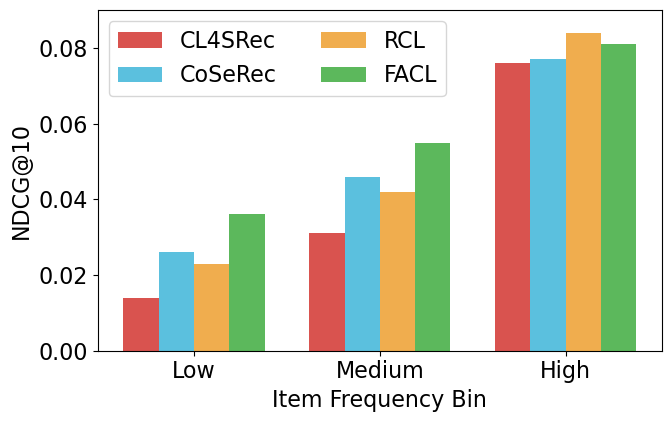

In [104]:
groups = ['Low', 'Medium', 'High']
cl4srec = [0.014, 0.031, 0.076]
coserec = [0.026, 0.046, 0.077]
rcl     = [0.023, 0.042, 0.084]
facl    = [0.036, 0.055, 0.081]
plt.rcParams['font.size'] = 16

data = np.array([cl4srec, coserec, rcl, facl]) # shape (4,3)
bar_width = 0.19
x = np.arange(len(groups))
colors = ["#d9534f","#5bc0de","#f0ad4e","#5cb85c"]

plt.figure(figsize=(7,4.5))
for i, (values, label) in enumerate(zip(data, ["CL4SRec","CoSeRec","RCL","FACL"])):
    plt.bar(x + (i-1.5)*bar_width, values, width=bar_width, color=colors[i], label=label)
plt.xticks(x, groups, fontsize=16)
plt.ylabel("NDCG@10", fontsize=16)
plt.xlabel("Item Frequency Bin", fontsize=16)
plt.ylim(0, 0.09)
# plt.title("HR@10 grouped by item frequency (Yelp)", fontsize=15)
plt.legend(ncol=2,fontsize=16)
plt.tight_layout()
plt.savefig("item_freq_bar_yelp.pdf")
plt.show()


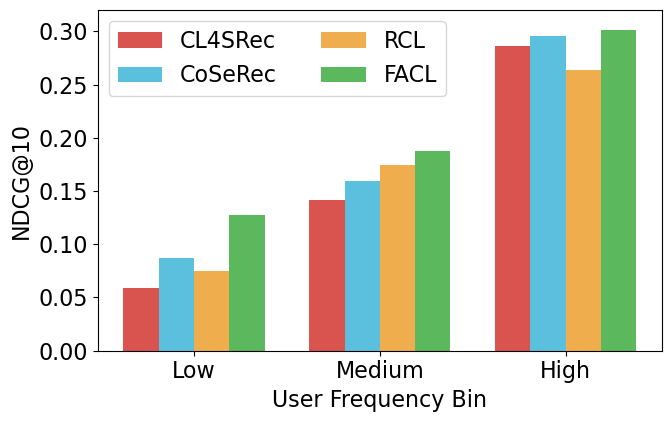

In [105]:
groups = ['Low', 'Medium', 'High']
cl4srec = [0.059, 0.142, 0.286]
coserec = [0.087, 0.159, 0.296]
rcl     = [0.075, 0.174, 0.264]
facl    = [0.127, 0.188, 0.301]
plt.rcParams['font.size'] = 16

data = np.array([cl4srec, coserec, rcl, facl])
bar_width = 0.19
x = np.arange(len(groups))
colors = ["#d9534f","#5bc0de","#f0ad4e","#5cb85c"]

plt.figure(figsize=(7,4.5))
for i, (values, label) in enumerate(zip(data, ["CL4SRec","CoSeRec","RCL","FACL"])):
    plt.bar(x + (i-1.5)*bar_width, values, width=bar_width, color=colors[i], label=label)
plt.xticks(x, groups, fontsize=16)
plt.ylabel("NDCG@10", fontsize=16)
plt.xlabel("User Frequency Bin", fontsize=16)
plt.ylim(0, 0.32)
# plt.title("HR@10 grouped by user frequency (ML-20M)", fontsize=15)
plt.legend(ncol=2,fontsize=16)
plt.tight_layout()
plt.savefig("user_freq_bar_ml20m.pdf")
plt.show()


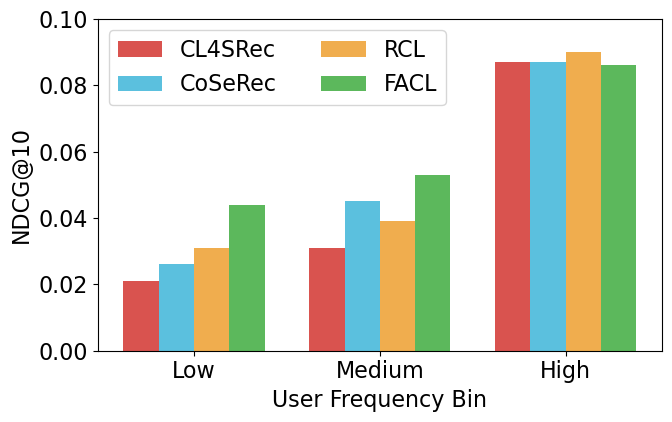

In [106]:
groups = ['Low', 'Medium', 'High']
cl4srec = [0.021, 0.031, 0.087]
coserec = [0.026, 0.045, 0.087]
rcl     = [0.031, 0.039, 0.090]
facl    = [0.044, 0.053, 0.086]
plt.rcParams['font.size'] = 16

data = np.array([cl4srec, coserec, rcl, facl])
bar_width = 0.19
x = np.arange(len(groups))
colors = ["#d9534f","#5bc0de","#f0ad4e","#5cb85c"]

plt.figure(figsize=(7,4.5))
for i, (values, label) in enumerate(zip(data, ["CL4SRec","CoSeRec","RCL","FACL"])):
    plt.bar(x + (i-1.5)*bar_width, values, width=bar_width, color=colors[i], label=label)
plt.xticks(x, groups, fontsize=16)
plt.ylabel("NDCG@10", fontsize=16)
plt.xlabel("User Frequency Bin", fontsize=16)
plt.ylim(0, 0.10)
# plt.title("HR@10 grouped by user frequency (Yelp)", fontsize=15)
plt.legend(ncol=2,fontsize=16)
plt.tight_layout()
plt.savefig("user_freq_bar_yelp.pdf")
plt.show()
